<a href="https://colab.research.google.com/github/kbehrman/foundational-python-for-data-science/blob/main/Chapter-10%3AVisualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Notes
* Matplotlib
    - basemap extension to draw maps
    - gallery: https://matplotlib.org/gallery/index.html
    - low-level interface
* Seaborn 
    - less code for similar plots
    - correlation matrix
    - statistical work
    - built on matplotlib
    - default styles and color palettes better?
* Plotly 
    - Javascript
    - scatter_geo for map plot
    - interactive plots
    - online platform
    - some charts not found in most other libraries
      (contour plots, dendofrmas, 3D charts)
* Bokeh
    - https://docs.bokeh.org/en/latest/
    - 'interactive library for web browsers'
    - Javascript, json, html...
    - iteractive, web-ready plots
    - support streaming/real time
    - three interface levels
    - brushing -> interact between plots
* geoplotlib
    - maps, geographical data
    - requires pyglet
* ggplot based on ggplot2 (R)
* gleam inspired by R Shiny. turn analysis into web apps
* pygal
    - easy simple plots
* folium
    - interactive maps (like google map)
* missingno

## Matplotlib

Matplotlib is a bedrock tool for creating publication ready charts. It is both used extensivly on it's own, and as the basis of other plotting libraries. It is part of the SciPy ecosystem, along with NumPy, SciPy, and Pandas. It is a very large project with wide-ranging capabilities, but because of this size, it can be complicated to use. 

There are muliple interfaces for it's use. One interface you may see if you search online, espicially in older examples is pylab, which is generally imported:


In [4]:
from matplotlib.pylab import *

While these examples may have some use, the use of pylab is now discouraged. It was originally intended to simulate an environment similar to that of MATPLOT, a non-python mathematical plotting tool. But importing all of the contents of a module, which is what you get with the `import *`, is generally seen as a bad practice in Python. The recomended practice is to explicitly import only what you will use.

The recommended interface for matplotlib is pyplot, which is by convenion aliased as plt:

In [1]:
import matplotlib.pyplot as plt

Two main concepts in matplotlib are figures and axes. Figures are where data is graphed. Axes are the areas where points can be specified using coordinates. Axes are visualized using figures. A single figure may have multiple axes, but an axes can only be attached to a single figure. 

Matplotlib offers two approaches to creating figures and axes. One creates them explicitly, the other implicitly. We will look at the latter first. There are some plotting methods, such as `plt.plot` and `plt.hist`, which plot to current axes and figure. It will create the axes and parent figure if they don't exist.

The method `plt.plot` creates a line plot based on x and y values.

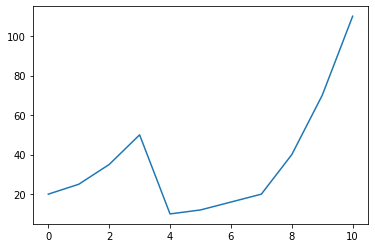

In [6]:
X = [0, 1, 2, 3, 4 ,5, 7, 8, 9, 10]
Y = [20, 25, 35, 50, 10, 12, 20, 40, 70, 110]
fig = plt.figure()
plt.plot(X, Y)

### Styling Plots
We can control style of the plot using two different mechanisims. One is to use any of the properties of the matplotlib.Line2D class. The properties control the markers used in the plot, the style of the line, and the color. The full listing of Line2D properties can be found in the matplotlib documentation, the current version is here  https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.lines.Line2D.html. You can use these properties as keyword arguments to `plt.plot`. We will demonstrate using the marker, linestyle, and color properties. 

The available marker types are
- '.' point marker
- ',' pixel marker
- 'o' circle marker
- 'v' triangle_down marker
- '^' triangle_up marker
- '<' triangle_left marker
- '>' triangle_right marker
- '1' tri_down marker
- '2' tri_up marker
- '3' tri_left marker
- '4' tri_right marker
- 's' square marker
- 'p' pentagon marker
- '*' star marker
- 'h' hexagon1 marker
- 'H' hexagon2 marker
- '+' plus marker
- 'x' x marker
- 'D' diamond marker
- 'd' thin_diamond marker
- '|' vline marker
- '_' hline marker

We can specify the marker type using the keyword marker. To set the markers as squares:

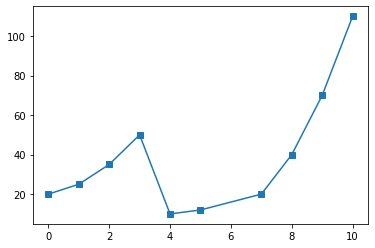

In [7]:
X = [0, 1, 2, 3, 4 ,5, 7, 8, 9, 10]
Y = [20, 25, 35, 50, 10, 12, 20, 40, 70, 110]

fig = plt.figure()
plt.plot(X, Y, marker='s')

The available line styles are:
- '-' solid line style
- '--' dashed line style
- '-.' dash-dot line style
- ':' dotted line style

Use the keyword linestyle to set this parameter:

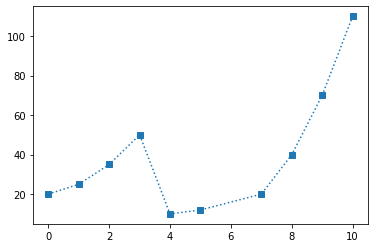

In [8]:
X = [0, 1, 2, 3, 4 ,5, 7, 8, 9, 10]
Y = [20, 25, 35, 50, 10, 12, 20, 40, 70, 110]

fig = plt.figure()
plt.plot(X, Y, marker='s', linestyle=':')

The avalable colors are:
- 'b' blue
- 'g' green
- 'r' red
- 'c' cyan
- 'm' magenta
- 'y' yellow
- 'k' black
- 'w' white

They can be set using the color keyword:

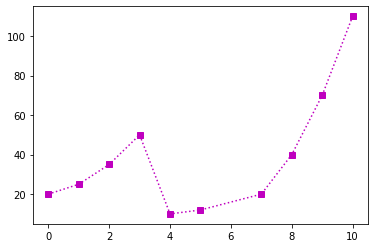

In [9]:
X = [0, 1, 2, 3, 4 ,5, 7, 8, 9, 10]
Y = [20, 25, 35, 50, 10, 12, 20, 40, 70, 110]

fig = plt.figure()
plt.plot(X, Y, marker='s', linestyle=':', color='m')

An alternative mechanism to set style properties is the fmt argument. This is a position parameter, to the right of the Y parameter. It consists of a format string which uses a short hand for marker, line style and color settings. The format string is of the form '[marker][line][color]' with all of the sections being optional. For example, to set the markers to squares, the line style to dashed, and the color to red, we use the format string 's-.r':

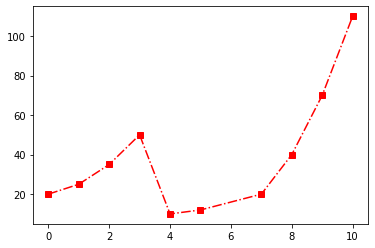

In [10]:
X = [0, 1, 2, 3, 4 ,5, 7, 8, 9, 10]
Y = [20, 25, 35, 50, 10, 12, 20, 40, 70, 110]
fmt = 's-.r'
fig = plt.figure()
plt.plot(X, Y, fmt)

We can use both a format string and a keyword argument together. Here we combine our format string with the keyword linewidth:

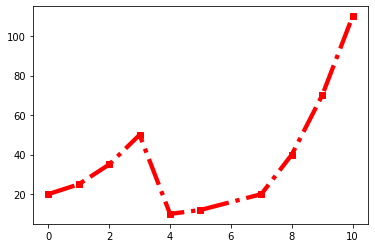

In [11]:
X = [0, 1, 2, 3, 4 ,5, 7, 8, 9, 10]
Y = [20, 25, 35, 50, 10, 12, 20, 40, 70, 110]
fmt = 's-.r'
fig = plt.figure()
plt.plot(X, Y, fmt, linewidth=4.3)

### Labeled data 
Matplotlibs plotting functions can also use labeled data. This includes Pandas DataFrames, dictionaries, and pretty much any data structure with which data is accessed using bracket syntax. Instead of supplying a sequence of values for x and y, we supply the appropriate labels.  

Let's create a DataFrame of US men and womens average heights over a sixteen year period:

In [12]:
import pandas as pd
# https://www.cdc.gov/nchs/data/nhsr/nhsr122-508.pdf

data = {"Years": ["2000", "2002", "2004", "2006", "2008", "2010", "2012", "2014", "2016"],
        "Men": [189.1, 191.8, 193.5, 196.0, 194.7, 196.3, 194.4, 197.0, 197.8],
        "Women": [175.7, 176.4, 176.5, 176.2, 175.9, 175.9, 175.7, 175.8, 175.3]}

heights_df = pd.DataFrame(data)
heights_df

,Years,Men,Women
0,2000,189.1,175.7
1,2002,191.8,176.4
2,2004,193.5,176.5
3,2006,196.0,176.2
4,2008,194.7,175.9
5,2010,196.3,175.9
6,2012,194.4,175.7
7,2014,197.0,175.8
8,2016,197.8,175.3


We can create a line plot of womens heights by specifying the labels of the columns to use for x and y, as well as the DataFrame from which to pull the data:

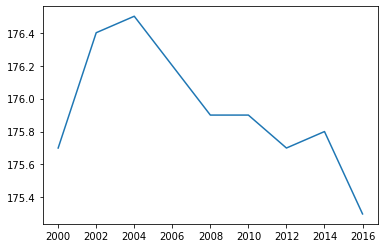

In [13]:
fig = plt.figure()
plt.plot('Years', 'Women', data=heights_df)


### Plotting Multiple Sets of Data:

There are three approaches to plotting multiple sets of data on the same chart. The first is to just call the plotting function multiple times. Remember that `plt.plot` uses the current axes and figure. This means that multiple calls will continue sharing the same figure and plot.


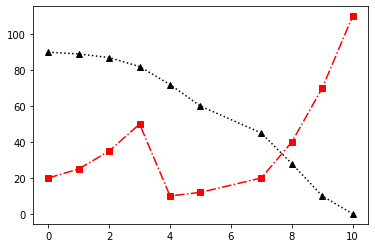

In [14]:
X = [0, 1, 2, 3, 4 ,5, 7, 8, 9, 10]
Y = [20, 25, 35, 50, 10, 12, 20, 40, 70, 110]
fmt = 's-.r'

X1 = [0, 1, 2, 3, 4 ,5, 7, 8, 9, 10]
Y2 = [90, 89, 87, 82, 72, 60, 45, 28, 10, 0]
fmt2 = '^k:'
fig = plt.figure()
plt.plot(X, Y, fmt)
plt.plot(X1, Y2, fmt2)

We can also pass multiple data sets to the plotting function directly.

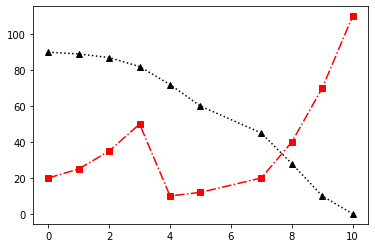

In [15]:
fig = plt.figure()
plt.plot(X, Y, fmt, X1, Y2, fmt2)

For labeled data, we can pass multiple labels, and each column will be added to the chart.

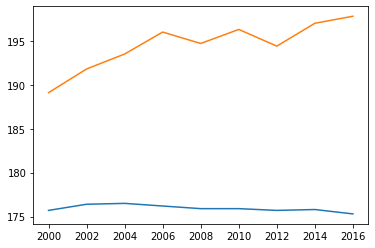

In [16]:
fig = plt.figure()
plt.plot('Years', 'Women', 'Men', data=heights_df)

Matplotlib offers convience funtions to add labels, a title and a chart legend.

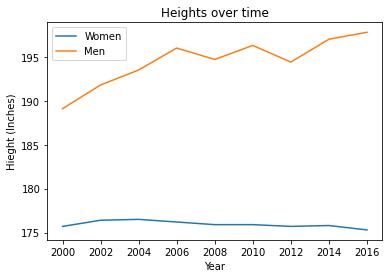

In [17]:
fig = plt.figure()
plt.plot('Years', 'Women', 'Men', data=heights_df)
plt.xlabel('Year')
plt.ylabel('Hieght (Inches)')
plt.title("Heights over time")
plt.legend(['Women', 'Men'])

### Object Oriented Style
The implicit means of dealing with figures and axes that we seen up until now is a handy way to explore data, espcielly in an interactive environment. Matplotlib also allows for dealing with figures and axes directly, which gives a more control. The `plt.subplots()` returns a figure and as axes as we specify. We can then plot on the axes in a way similar to what we did using implicit plotting.

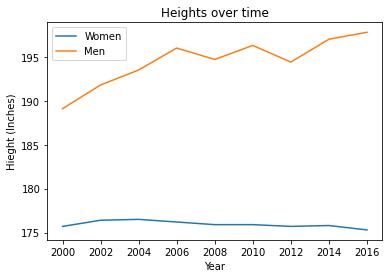

In [18]:
fig, ax = plt.subplots()
ax.plot('Years', 'Women', 'Men', data=heights_df)
ax.set_xlabel('Year')
ax.set_ylabel('Hieght (Inches)')
ax.set_title("Heights over time")
ax.legend(['Women', 'Men'])

If we want to make multiple charts on the same figure, we can specify multiple axes. The first argument specifies the number of rows and the second the number of columns.

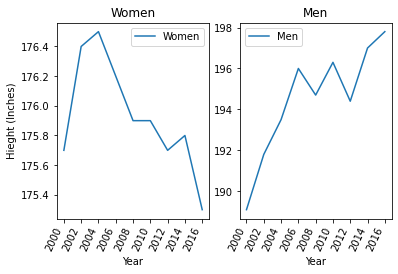

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2)


ax1.plot('Years', 'Women', data=heights_df)
ax1.set_xlabel('Year')
ax1.set_ylabel('Hieght (Inches)')
ax1.set_title("Women")
ax1.legend(['Women'])

ax2.plot('Years', 'Men', data=heights_df, )
ax2.set_xlabel('Year')
ax2.set_title("Men")
ax2.legend(['Men'])

fig.autofmt_xdate(rotation=65)

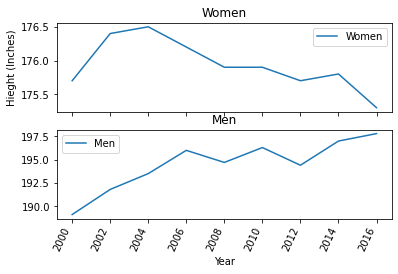

In [20]:
fig, (ax1, ax2) = plt.subplots(2, 1)


ax1.plot('Years', 'Women', data=heights_df)
ax1.set_xlabel('Year')
ax1.set_ylabel('Hieght (Inches)')
ax1.set_title("Women")
ax1.legend(['Women'])

ax2.plot('Years', 'Men', data=heights_df, )
ax2.set_xlabel('Year')
ax2.set_title("Men")
ax2.legend(['Men'])

fig.autofmt_xdate(rotation=65)

The implicit style of plotting is great for exploring data in an interactive mode. The explicit style gives you much more control, and is generally recomended for plotting in production code.

### Other plot types:
In this chapter, we have concentrated on Matplotlib line plots, but Matplotlib offers many other plot types, including histograms, scatter plots, and pie charts. A full listing of these can be found in the Matplotlib documentation: https://matplotlib.org/3.3.3/api/axes_api.html#plotting

## Seaborn

Seaborn is a statistical plotting library build on top of Matplotlib. It is designed to make creating good looking statistics graphics easy, and is known, among other things, for having a generally better looking default style.

By convention, it is imported as `sns`:

In [21]:
import seaborn as sns

Seaborn has a series of sample data sets. These are used in the provided documentation and tutorials. They are also a convienient source of data when exploring it's features. The data sets are loaded as Pandas DataFrames using the function `sns.load_dataset()`, with the name of the data set as an argument. The available data sets are listed here: https://github.com/mwaskom/seaborn-data

Here we load up a data set of car crashes and then select the columns we wish to work with:

In [22]:
car_crashes = sns.load_dataset('car_crashes')
car_crashes = car_crashes[['total', 'not_distracted', 'alcohol']]

car_crashes.head(3)

,total,not_distracted,alcohol
0,18.8,18.048,5.640
1,18.1,16.290,4.525
2,18.6,15.624,5.208


We can use the Seaborns sns.relplot() function to plot the reloation between these two columns:

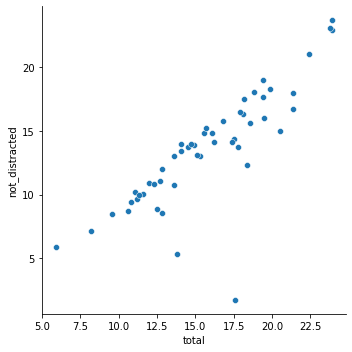

In [23]:
sns.relplot(data=car_crashes,
            x='total',
            y='not_distracted')



figure_name = 'Figure.10.15.png'
plt.tight_layout()

### Seabourn Themes (https://seaborn.pydata.org/tutorial/aesthetics.html)
Seaborn themes are a easy way to control the look of charts. To use Seaborns default theme, run:

In [24]:
sns.set_theme()

If we replot out data we can see the new look:

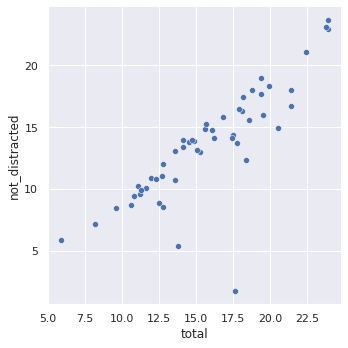

In [25]:
sns.relplot(data=car_crashes,
            x='total',
            y='not_distracted')



figure_name = 'Figure.10.16.png'
plt.tight_layout()

When we set a Seaborn theme, it will be applied to any conseqeunt plots, even those made using Matplotlib directly. Seaborn groups Matplotlib parameters into two groups, one dealing with aesthetic style of a plot, the other with scale elements. 

Five preset style themes are available, darkgrid, whitegrid, dark, white, and ticks. We can set the style using the sns.set_style() function:

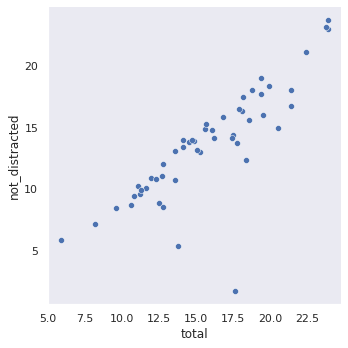

In [26]:
sns.set_style('dark')
sns.relplot(data=car_crashes,
            x='total',
            y='not_distracted')


figure_name = 'Figure.10.17.png'
plt.tight_layout()

### scale
The themes available for setting the scale of figure elements are based on the target presentation. They are paper, notebook, talk, and poster. 
They are set using the `sns.set_context` function:

In [27]:
sns.set_context('talk')

If we replot our data, we see that the scale is adjusted:

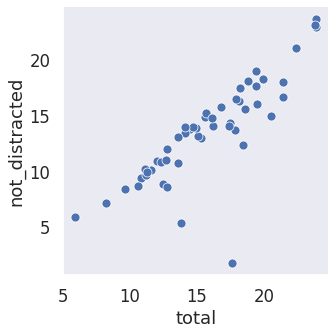

In [28]:
sns.relplot(data=car_crashes,
            x='total',
            y='not_distracted')

figure_name = 'Figure.10.18.png'
plt.tight_layout()

Seaborn offfers many plot types, one of the most useful for looking for correllations in data is the sns.pairplot(). It creates a grid of axes plotting the relation amoung all of the columns of the DataFrame. 

In [29]:
df = sns.load_dataset('iris')

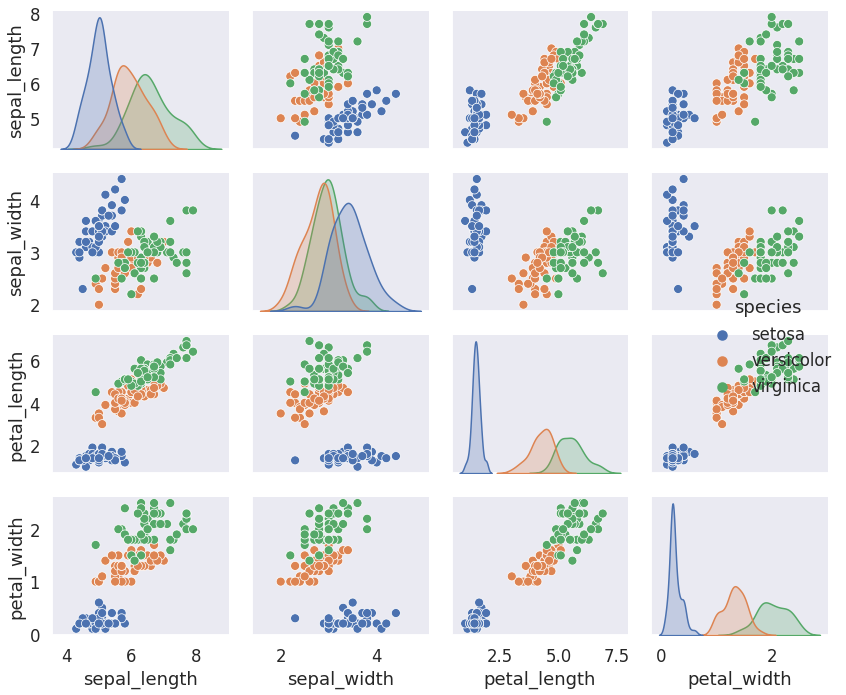

In [30]:
sns.pairplot(df, hue='species')

figure_name = 'Figure.10.19.png'
plt.tight_layout()

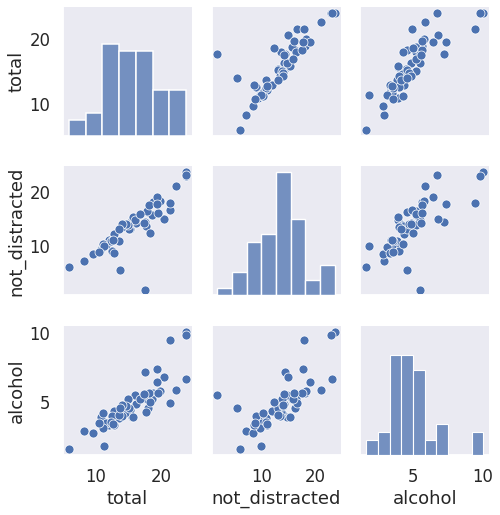

In [31]:
sns.pairplot(car_crashes)

figure_name = 'Figure.10.20.png'
plt.tight_layout()

## Plotly

Matplotlib and Seaborn are excellant tools for creating publication static charts. Both can be extended to create interactive data presentations, but two libraries Plotly and Bokeh are specifically designed for the creation of high quality interactive charts. Plotly offers many chart types, but one way it stands out is easy to build 3D charts.  


In [2]:
import plotly.express as px

In [3]:
iris = px.data.iris()

In [4]:
fig = px.scatter_3d(iris, 
                    x='sepal_length', 
                    y='petal_width', 
                    z='petal_length',
                    color='species')


camera = dict(
    eye=dict(x=1.0, y=0.9, z=2.5)
)

fig.update_layout(scene_camera=camera)
figure_name = 'Figure.10.21.png'
plt.tight_layout()

fig.show()

<Figure size 432x288 with 0 Axes>

## Bokeh

Bokeh is an alternative to plotly for easily creating interactive graphics. One way that Bokeh stands out is its use of a special data object, ColumnDataSource. These objects offer improved performance and allow, among other things, the data to be updated or appended without having to reload all of the state. The data source can also be shared across figures, so that interaction with the data in one figure modifies the data in another. 

In [ ]:
!pip install bokeh

In [ ]:
!pip install selenium

In [5]:
Y = [x for x in range(0,200, 2)]
Y1 = [x**2 for x in Y]
X = [x for x in range(100)]
data={'x':X,
      'y':Y,
      'y1':Y1}


In [8]:
from bokeh.io import output_notebook, export_png
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.layouts import gridplot
from bokeh.io import output_notebook
output_notebook()

TOOLS = "box_select"

source = ColumnDataSource(data=data)
left = figure(tools=TOOLS,
           title='Brushing')

left.circle('x',
               'y',
               source=source)

right = figure(tools=TOOLS,
           title='Brushing')
right.circle('x',
                'y1',
                source=source)
p = gridplot([[left, right]])

figure_name = 'Figure.10.22.png'

show(p)

In these figures we have shared a data source object and enabled the box_select tool. This enabled selecting data in one figure, and having the corresponding data in the second to also be selected.

### Other Visualization Libraries

There are many other great visualization libraries. Here are some others you may want to explore:
- geoplotlib: visualization of maps and  geographical data
- ggplot: based on the R language package ggplot2
- pygal: package for easy simple plots
- folium: for creating interactive maps
- missingno: visualization of missing data

## Summary
Visualization is an extremely useful part of data exploration and important part of data presentation. There are many libraries available for visualizing data, with different specialities and focuses. Matplotlib is the base for many other libraries. It offers wide capabilites, but a steep learning curve. Seaborn is a statistics visualization library build on Matplotlib. It makes it easy to improve the look of plots and to create plots for different target media. Plotly and Bokeh are both designed for the creation of interactive charts and dashboards. 

## Questions

    

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

data = {'X'  : [x for x in range(50)],
        'Y'  : [y for y in range(50, 0, -1)],
        'Y1' : [y**2 for y in range(25, 75)]}

df = pd.DataFrame(data)

1. Use Matplotlib to plot the relationship between columns 'X' and 'Y'.
2. Use Matplotlib to add the relationship between columns 'X' and 'Y1' to the same plot.
3. Use Matplotlib to to plot the two relationships on separate axes of the same figure.
4. Use Bokeh to change the theme to darkgrid and then repeat the plots from 